In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/train.csv"
df = pd.read_csv(url,usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [ ]:
#imputation
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [11]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([23. , 29. , 28. , 57. , 28. , 31. , 18. , 14. , 21. , 63. , 41. ,
       21. , 50. , 28. , 31. , 19. , 62. , 60. , 44. , 22. , 37. , 19. ,
       58. , 18. , 48. , 26. , 38. , 16. , 21. ,  2. , 27. , 23. , 39. ,
       41. , 49. , 56. , 21. , 22. , 33. ,  5. , 45. , 26. , 32. , 19. ,
       54. ,  1. , 28. , 17. , 24. , 36. , 42. , 41. , 29. , 21. , 29. ,
       24. , 24. , 38. , 24. , 22. , 28. , 25. , 22. , 23. , 30.5, 52. ,
       36. , 30. , 31. , 16. , 40. ,  8. , 52. , 21. , 27. , 16. , 26. ,
       34. , 40.5, 23. , 58. , 38. , 42. , 24. , 70.5, 28. , 14. , 33. ,
       19. , 36. , 29. , 38. , 25. , 49. , 34. , 27. , 31. ,  9. , 23. ,
       47. , 18. , 19. , 25. , 26. , 42. , 31. , 14. , 43. , 24. ,  9. ,
       31. , 43. , 40. , 21. , 19. ,  3. , 18. , 29. , 46. , 50. , 25. ,
        2. , 66. , 35. ,  2. , 34. , 35. , 30. , 47. , 39. , 65. , 44. ,
       25. , 20. , 44. , 20. , 29. , 22. , 14. , 23. , 34.5, 40. ,  3. ,
        9. , 24. , 11. , 21. , 33. ])

In [12]:
X_train['Age'].isnull().sum()

148

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,29.0
493,71.0,49.5042,71.0
527,NaN,221.7792,23.5


C:\Users\HP\AppData\Local\Temp\ipykernel_4168\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_4168\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imp

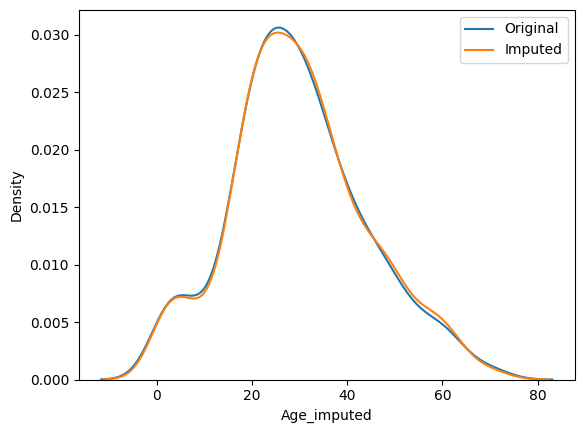

In [14]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [15]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  204.40477319628155


In [16]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,46.875227
Age,71.512440,204.349513,204.349513
Age_imputed,46.875227,204.349513,204.404773


<AxesSubplot: >

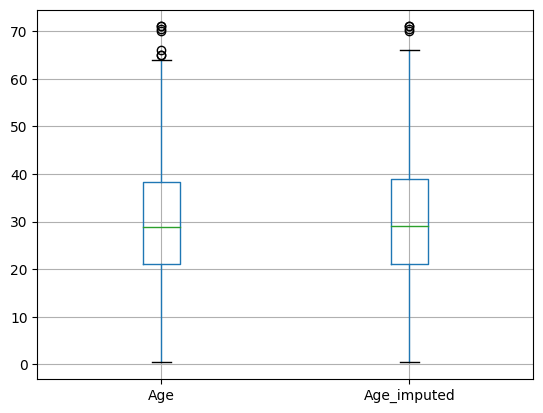

In [17]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare'])) for production this line of code

In [21]:
url1="https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/house-train.csv"
data = pd.read_csv(url1,usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [22]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [23]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [24]:
X = data
y = data['SalePrice']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [27]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1297,NaN,TA,140000,TA,NaN
1388,Gd,TA,377500,TA,Gd
401,Gd,TA,164990,TA,Gd
952,NaN,TA,133900,TA,NaN
809,NaN,Fa,106000,Fa,NaN


In [28]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\HP\AppData\Local\Temp\ipykernel_4168\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\HP\AppData\Local\Temp\ipykernel_4168\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\HP\AppData\Local\Temp\ipykernel_4168\856878696.py:4: SettingWithCopyWarning: 
A value is tryin

In [29]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [30]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [31]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.646465
TA,0.412439,0.540965
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.033670


C:\Users\HP\AppData\Local\Temp\ipykernel_4168\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\HP\AppData\Local\Temp\ipykernel_4168\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

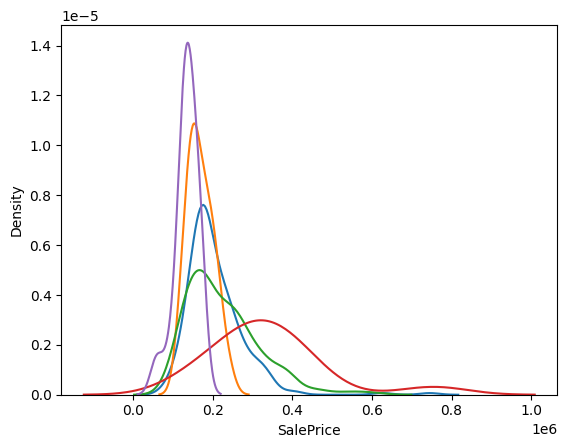

In [32]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4168\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\HP\AppData\Local\Temp\ipykernel_4168\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

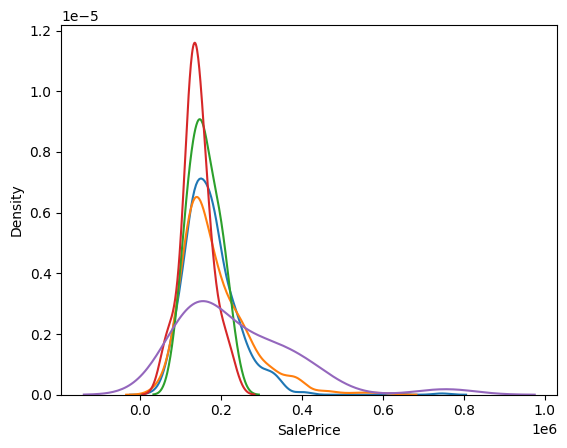

In [33]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()